In [1]:
# Install libraries
!pip install plotly
!pip install wordcloud
!pip install hvplot
!pip install -U kaleido

# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)


In [2]:
# Read the dataframe

df = pd.read_csv(r'C:\Users\WANCHI\Desktop\CV\materials\Course 8 case study\E-Commerce Riviews\Dataset E-Commerce Reviews.csv', 
                 index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.drop_duplicates()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
# Check nan Values

df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
# Drop null values

df.dropna(subset=['Title', 'Review Text'], inplace=True)
df.isnull().sum()

Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [7]:
df[['Rating']].describe()

,Rating
count,19675.000000
mean,4.183685
std,1.112055
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


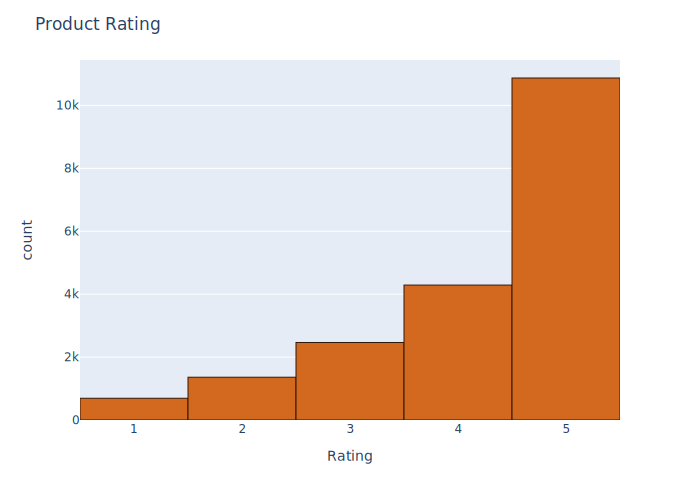

In [8]:
# Plot the histogram of rating

fig1 = px.histogram(df, x="Rating")
fig1.update_traces(marker_color="chocolate",marker_line_color='rgb(48,23,8)',
                  marker_line_width=1)
fig1.update_layout(title_text='Product Rating')
fig1.show()

In [9]:
# Plot the horizontal bar graph of class name with rating = 1,2

df_class = df[(df['Rating'] == 1) | (df['Rating'] == 2)]
df_class['Class Name'].value_counts().hvplot.barh()

:Bars   [index]   (Class Name)

In [10]:
# Plot the horizontal bar graph of clothing ID with rating = 1,2

df_id = df[(df['Rating'] == 1) | (df['Rating'] == 2)]
df_id['Clothing ID'].value_counts()[:10].hvplot.barh()

:Bars   [index]   (Clothing ID)

In [11]:
# Create smaller data frame with data columns in need

df.drop(labels=['Clothing ID','Age', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 
                'Department Name','Class Name' ], axis=1, inplace=True)
df.head()

,Title,Review Text,Rating
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5


In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WANCHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


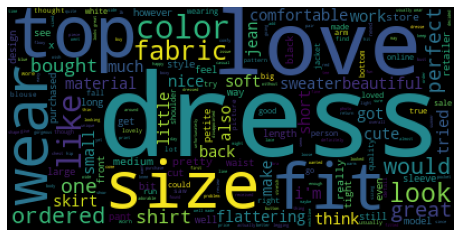

In [13]:
# Create stopwords list:

stopwords = set(stopwords.words('english'))
textt = " ".join(review for review in df['Review Text'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

# plot the WordCloud image 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
# Assign reviews with rating > 3 as positive sentiment
# rating < 3 negative sentiment
# remove rating = 3
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 3 else -1)
df.head(10)

,Title,Review Text,Rating,sentiment
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,-1
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1
8,Flattering,I love this dress. i usually get an xs but it ...,5,1
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1
12,Perfect!!!,More and more i find myself reliant on the rev...,5,1
13,Runs big,Bought the black xs to go under the larkspur m...,5,1
15,"Nice, but not for my body",I took these out of the package and wanted the...,4,1


In [15]:
# Split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [16]:
## beautiful, cute and great removed because they were included in negative sentiment

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(['beautiful','cute','great']) 

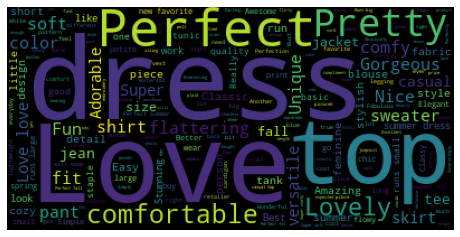

In [17]:
# Wordcloud — positive sentiment

pos = " ".join(review for review in positive.Title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

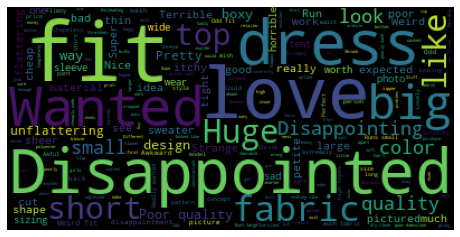

In [18]:
# Wordcloud — negative sentiment

neg = " ".join(review for review in negative.Title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [19]:
# Order the data with sentiment

df.sort_values(by=['sentiment'], inplace=False, ascending=True ).head(30)

,Title,Review Text,Rating,sentiment
12504,Color not as pictured on website,I wish i had read the other review about the c...,2,-1
20254,Not for the full figured,This would be a great blouse for flat chested ...,1,-1
9631,Really odd fit!,This looked so odd on me! i decided to give it...,2,-1
3792,Dress is extremely pear-shaped.,"I bought this dress in an xs, and am 5'4"", 115...",2,-1
15037,Runs big,This dress looks so cute in the pictures-i lov...,2,-1
9628,Beautiful but falls apart,"This top is absolutely gorgeous, but i followe...",2,-1
3799,See through,I would really like this dress if the material...,1,-1
15042,Dress is made for broad shoulders and small waist,The fabric and colors of this dress are beauti...,2,-1
3806,Poor quality,Recently received this and was very disappoint...,1,-1
3778,Not great,Looks much nicer in the photo. i expected a mu...,2,-1


In [20]:
# Count the number of negative reviews

df[df['sentiment'] == -1].count()

Title          2051
Review Text    2051
Rating         2051
sentiment      2051
dtype: int64

In [21]:
# Filter 'Title' contains 'wanted,' 'love' or 'like'

df1 = df[df['Title'].str.contains('Wanted|wanted|Love|love|Like|like')]
df1[df1['sentiment'] == -1].head(30)

,Title,Review Text,Rating,sentiment
22,Not what it looks like,"First of all, this is not pullover styling. th...",2,-1
68,I wanted to love this top...,I really loved this top online and wanted to l...,2,-1
241,"Loved this, then washed it twice and it fell a...",I loved this dress from the moment i tried it ...,1,-1
581,Do not like the front,The back of this t-shirt looks cute but the fr...,2,-1
603,"Wanted to love, but sadly will return.","These run very small!! they are also short, al...",1,-1
793,If only it looked like the photo.....,"This sweater was a big let down. i am 5'2"" so ...",1,-1
806,Wanted to love it - but . . .,"I wanted to love this. however, the fit was fu...",2,-1
880,So wanted to love it...,"Ditto what the first reviewer said, unfortunat...",2,-1
1061,Farm animal pullover,Wanted to love this sweater for its beautiful ...,2,-1
1063,"I wanted to love this sweater, but......",This is a beautiful sweater with deep rich col...,2,-1


In [22]:
# Count the number of 'Title' which contains 'wanted,' 'love' or 'like'

df1[df1['sentiment'] == -1].count()

Title          169
Review Text    169
Rating         169
sentiment      169
dtype: int64

In [23]:
# Calculate the proportion of 'Title' which contains 'wanted,' 'love' or 'like'

df1[df1['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          8.239883
Review Text    8.239883
Rating         8.239883
sentiment      8.239883
dtype: float64

In [24]:
# Filter 'Title' contains 'disappointed' 
df2 = df[df['Title'].str.contains( 'disappointed')]
df2[df2['sentiment'] == -1].head(30)

,Title,Review Text,Rating,sentiment
350,So disappointed! please fix it!,"This blouse is so beautiful - the collar, slee...",2,-1
755,So very disappointed,I love retailer and fell in love as soon as i ...,2,-1
2503,So disappointed,"I loved this coat in the picture, and couldn't...",1,-1
3168,Sadly disappointed,"I wanted to love these jeans, but as a woman w...",2,-1
4259,Poor quality - disappointed,I am sooooooo massively disappointed in this p...,2,-1
4908,So disappointed,I wore this bodysuit once. it had a hole under...,1,-1
5302,Really disappointed with the quality.,I loved this skirt when i tried it on. the mat...,1,-1
8338,Very disappointed,"Regretfully, this dress is on its way back for...",2,-1
8697,So disappointed!,I couldn't wait to get this top in the mail si...,1,-1
8843,So disappointed #2,"The review above titled ""so disappointed"" coul...",2,-1


In [25]:
# Calculate the proportion of 'Title' which contains 'disappointed' 

df2[df2['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          1.267674
Review Text    1.267674
Rating         1.267674
sentiment      1.267674
dtype: float64

In [26]:
# Filter 'Title' contains 'fit,' 'big,' or 'huge'
df3 = df[df['Title'].str.contains( 'Fit|fit|Big|big|Huge|huge')]
df4 = df3[df3['Title'].str.contains( 'Huge disappointment|Big disappointment') == False]
df4[df4['sentiment'] == -1]

,Title,Review Text,Rating,sentiment
88,Huge,"Really cute piece, but it's huge. i ordered an...",2,-1
97,Huge,I was very excited to order this top in red xs...,1,-1
118,Awkward fitting,"First, the fabric is beautiful and lovely for ...",2,-1
185,"Fits strange, flimsy material",I was worried about this item when i ordered i...,2,-1
334,Not a good fit,This top was way too short (i'm only 5'1) and ...,1,-1
...,...,...,...,...
22657,Strange fit,"The pattern and fabric are lovely, but the sle...",2,-1
22803,"Drab color, weird fit","Couldn't make it work, even belted. ivory colo...",2,-1
22844,Sweater is huge!!,Had to return. ordered an xs which usually fit...,2,-1
23016,Large fit,I was really excited to get this dress and to ...,2,-1


In [27]:
# Calculate the proportion of 'Title' which contains 'fit,' 'big,' or 'huge'

df4[df4['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          11.847879
Review Text    11.847879
Rating         11.847879
sentiment      11.847879
dtype: float64

In [28]:
# Filter 'Title' contains 'quality' or 'fabric'
df5 = df[df['Title'].str.contains( 'Quality|quality|Fabric|fabric')]
df5[df5['sentiment'] == -1]

,Title,Review Text,Rating,sentiment
110,Poor quality,This is so thin and poor quality. especially f...,1,-1
114,Disappointing quality,The design/shape of the dress are quite flatte...,2,-1
389,Bad quality.,"I don't normally review my purchases, but i wa...",1,-1
475,Poor quality,"I bought this in the white, size m (140lbs., 5...",2,-1
1052,Quality & cut,My perspective is as a sewer so i'm more picky...,1,-1
...,...,...,...,...
23031,"Nice fabric, poor design","This dress has a beautiful fabric, i really ha...",2,-1
23255,"Looks great, poor quality",Pants are overpriced and very uncomfortable. t...,1,-1
23274,Cute but poor quality,"I'm 5'7"" 155lbs and ordered a large. it fit, b...",1,-1
23287,"Too much fabric, shoulders won't stay down","This is a gorgeous print, but i found it too f...",2,-1


In [29]:
# Calculate the proportion of 'Title' which contains 'quality' or 'fabric'

df5[df5['sentiment'] == -1].count() / df[df['sentiment'] == -1].count() *100

Title          7.557289
Review Text    7.557289
Rating         7.557289
sentiment      7.557289
dtype: float64

In [30]:
# Filter 'Title' contains 'color' 
df6 = df[df['Title'].str.contains('Color|color')]
df7 = df6[df6['Title'].str.contains('Great color|Lovely color|Cute color|Nice color|Pretty color|Beautiful color')== False] 
df7[df7['sentiment'] == -1]

,Title,Review Text,Rating,sentiment
518,Weird color and fit,Color is not like photo and fit doesn't work i...,2,-1
1618,Great quality and color but boxy and ill-fitting,I wanted to love this sweater. the photo of th...,2,-1
2675,Color run,I love the way these shorts fit and look; very...,1,-1
3552,Way too big/colors off,Finally received this in the mail today and wa...,2,-1
5450,"Orange color is pretty, quality is poor",I ordered the orange in size xl. the fit on me...,2,-1
6055,Color transfers to other clothes!,I really loved this vest online and decided to...,2,-1
9589,Colors are more intense than they appear,I purchased this dress for my graduation. the ...,2,-1
9765,Color not as shown,"The dress is very pretty, but the sequins are ...",2,-1
9778,Color is not as it appears in the photo,I was very surprised to see such dark blue seq...,2,-1
9857,Color bleeds and discolors the pant.,This is a problem i have had with the pilcro h...,2,-1


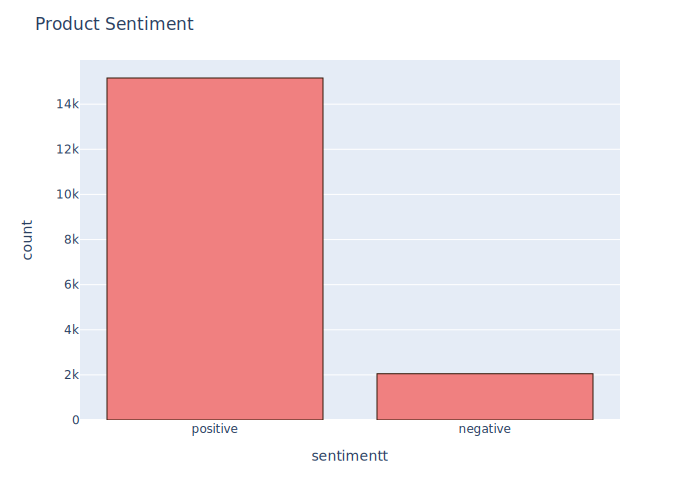

In [31]:
# Distribution of reviews with sentiment

df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig2 = px.histogram(df, x="sentimentt")
fig2.update_traces(marker_color="lightcoral",marker_line_color='rgb(48,23,8)',
                  marker_line_width=1)
fig2.update_layout(title_text='Product Sentiment')
fig2.show()

In [32]:
# Data Cleaning

def remove_punctuation(text):
    final = "".join(u for u in text if u not in (",", "?", ".", ";", ":", "!",'"',"'"))
    return final
df['Title'] = df['Title'].apply(remove_punctuation)


In [33]:
dfNew = df[['Title','sentiment']]
dfNew.head()

,Title,sentiment
3,My favorite buy,1
4,Flattering shirt,1
5,Not for the very petite,-1
6,Cagrcoal shimmer fun,1
7,Shimmer surprisingly goes with lots,1


In [34]:
# Split data into training and testing data

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [35]:
# Count vectorizer:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Title'])
test_matrix = vectorizer.transform(test['Title'])

In [36]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [38]:
# Fit model on data

lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
predictions = lr.predict(X_test)
predictions[0:20]

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1], dtype=int64)

In [40]:
# Find accuracy, precision, recall

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 220,   58],
       [ 203, 3139]], dtype=int64)

In [41]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.52      0.79      0.63       278
           1       0.98      0.94      0.96      3342

    accuracy                           0.93      3620
   macro avg       0.75      0.87      0.79      3620
weighted avg       0.95      0.93      0.93      3620

